In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import mapclassify
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable
import xlrd
usa = gpd.read_file('maps/USA_States/USA_States.shp')
usa = usa[(usa['STATE_ABBR'] != 'AK') & (usa['STATE_ABBR'] != 'HI')]
file = 'data/AFP200925p.xlsx'
df = pd.read_excel(file)
df = df.rename(columns={'State': 'STATE_ABBR'})
#df.info()

In [ ]:
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_verticalalignment('top')

plt.figure(figsize=(10,20))
y_pos = np.arange(50)

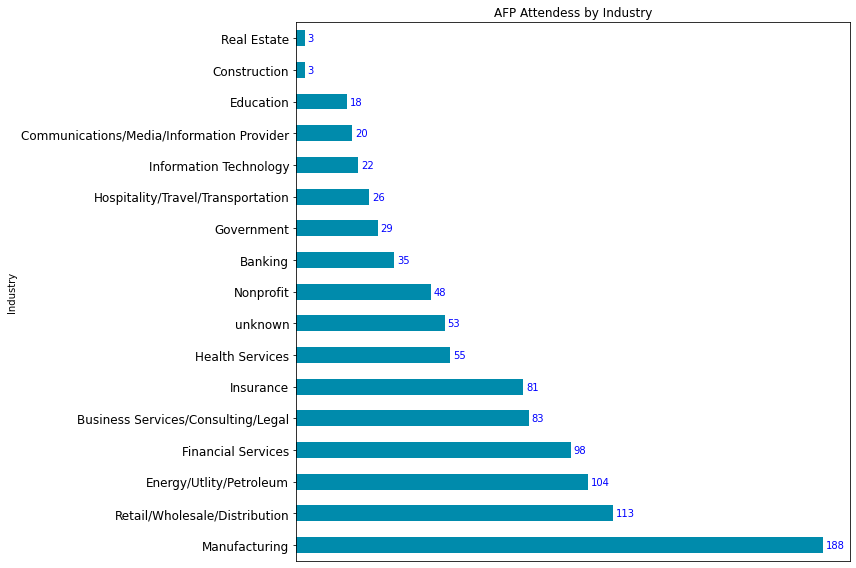

In [123]:
# BY INDUSTRY

ind_df = df['Industry'].value_counts(dropna=True, sort=True)
ind_df = pd.DataFrame(ind_df)
ind_df = ind_df.reset_index()
ind_df.columns = ['Industry', 'Attendees']
# ind_df.info()



title = 'AFP Attendess by Industry'
ax = ind_df.plot.barh(x='Industry', 
                       y='Attendees',
                       rot = 0,
                       legend = False,
                       fontsize = '16',
                       figsize=(12,8),
                       title = title,
                       color= '#008bac')

ax.tick_params(
            axis = 'x',          # changes apply to the x-axis
            which = 'both',      # both major and minor ticks are affected
            bottom = False,      # ticks along the bottom edge are off
            top = False,         # ticks along the top edge are off
            labelbottom = False
     ) 

ax.set_yticklabels(ind_df['Industry'],fontsize = 12, wrap = True)

for i, v in enumerate(ind_df['Attendees']):
    plt.text(v + 1, i - 0.1, str(v), color = 'blue', fontweight = 'regular')

plt.tight_layout()

ax.figure.savefig('afp_Industry.png', dpi=96)

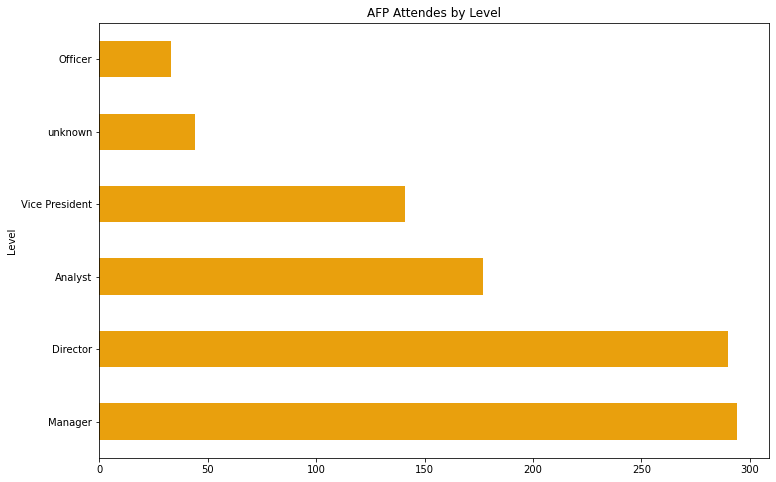

In [64]:
# BY LEVEL

levl_df = df['Level'].value_counts(dropna=True, sort=True)
levl_df = pd.DataFrame(levl_df)
levl_df = levl_df.reset_index()
levl_df.columns = ['Level', 'Attendees']
# levl_df.info()

title = 'AFP Attendes by Level'
ax = levl_df.plot.barh(x='Level', 
                       y='Attendees', 
                       rot = 0,
                       legend = False,
                       fontsize = '10',
                       figsize=(12,8),
                       title = title,
                       color= '#e9a00d')
ax.figure.savefig('afp_Level.png', dpi=96)

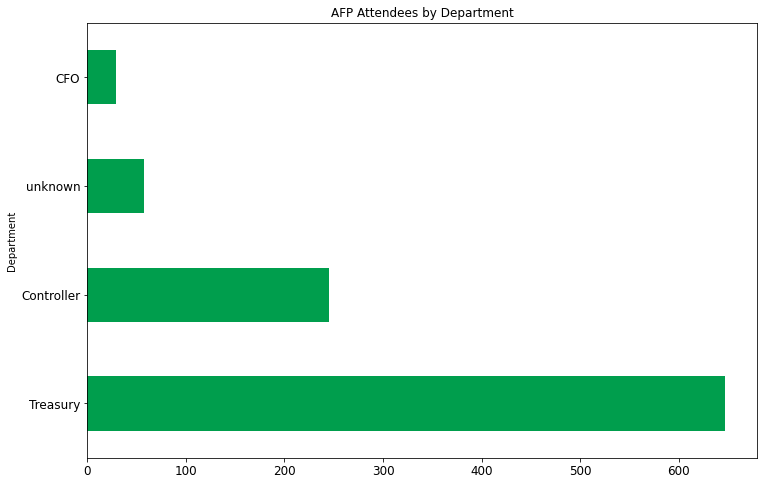

In [50]:
# BY DEPARTMENT

dept_df = df['Department'].value_counts(dropna=True, sort=True)
dept_df = pd.DataFrame(dept_df)
dept_df = dept_df.reset_index()
dept_df.columns = ['Department', 'Attendees']
#dept_df.info()

title = 'AFP Attendees by Department'
ax = dept_df.plot.barh(x='Department', 
                       y='Attendees', 
                       rot = 0,
                       legend = False,
                       fontsize = '12',
                       figsize=(12,8),
                       color = '#009e4d',
                       title = title)
ax.figure.savefig('afp_Department.png', dpi=96)

<Figure size 432x288 with 0 Axes>

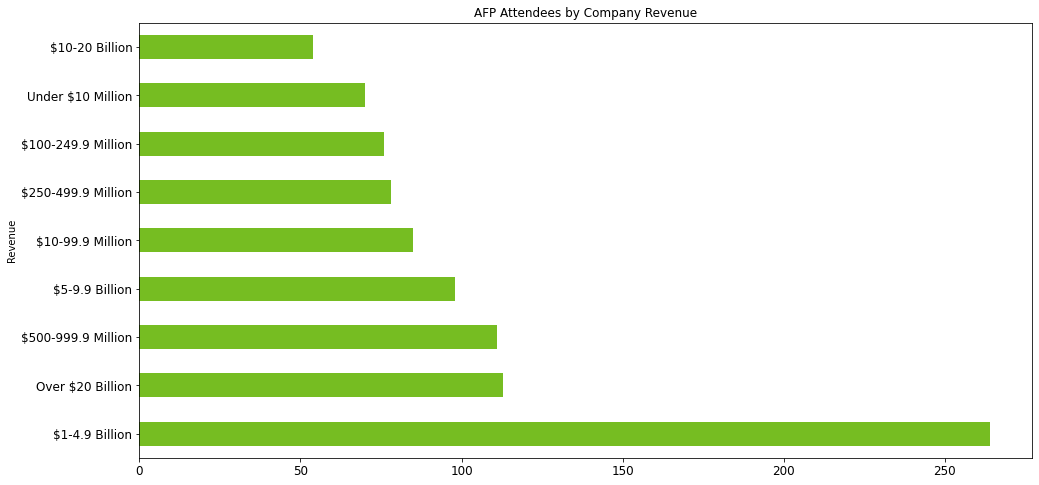

In [49]:
# BY REVENUE

rev_df = df['Revenue'].value_counts(dropna=True, sort=True)
rev_df = pd.DataFrame(rev_df)
rev_df = rev_df.reset_index()
rev_df.columns = ['Revenue', 'Attendees']
#dept_df.info()

plt.tight_layout()
title = 'AFP Attendees by Company Revenue'
ax = rev_df.plot.barh(x='Revenue', 
                       y='Attendees', 
                       rot = 0,
                       legend = False,
                       fontsize = '12',
                       figsize=(16,8),
                       color = '#76BD22',
                       title = title)
ax.figure.savefig('afp_Revenue.png', dpi=96)

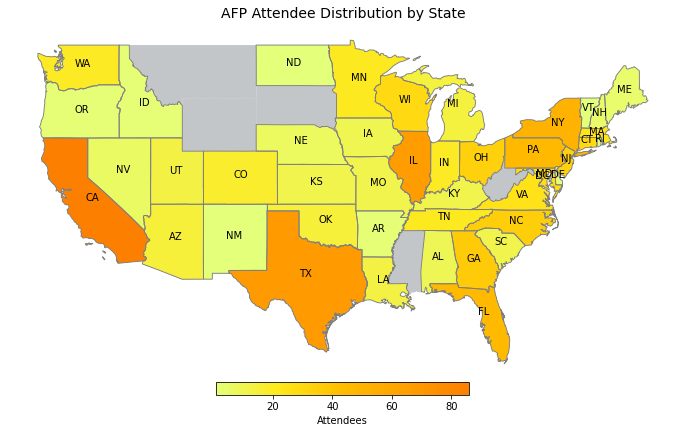

In [40]:
# ATTENDEE STATE DISTRIBUTION

value_counts = df['STATE_ABBR'].value_counts(dropna = False, sort = True)
state_df = pd.DataFrame(value_counts)
state_df = state_df.reset_index()
state_df.columns = ['STATE_ABBR', 'Attendees']
state_df.head(2)

# Add Attendees / State to Geo df
usa_gdf = usa.merge(state_df, on='STATE_ABBR')
usa_gdf.head(2)

title = 'AFP Attendee Distribution by State'
fig, ax = plt.subplots(1, figsize=(12,8))
ax.set_axis_off()
plt.tight_layout()
ax.set_title(title, size = '14', fontweight = '1')
divider = make_axes_locatable(ax)
usa.plot(ax = ax, color='#c2c6c9')
usa_gdf.apply(lambda x: ax.annotate(s=x.STATE_ABBR, xy=x.geometry.centroid.coords[0], ha='center', fontsize = 10, color = 'black'), axis=1)
usa_gdf.plot(column = 'Attendees', cmap='Wistia', ax = ax, legend = True, legend_kwds={'shrink': 0.3, 'label': 'Attendees', 'orientation': 'horizontal', 'pad': -0.2})
usa_gdf.boundary.plot(ax=ax, color='gray', linewidth=.9)


ax.figure.savefig('afp_usa.png', dpi=96)